In [54]:
import pandas as pd
import numpy as np

#Lectura del archivo Geographic
geometry = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/geographic.csv')

#Creación de Data Frame que va a almacenar el código del barrio con una de sus latitudes y longitudes relacionadas a un punto
df = pd.DataFrame({'Code':[],'Lat':[],'Lon':[]})
for barrio in geometry:
fila = int("0")
while fila < len(geometry):
    latitud = geometry[barrio][fila]
    longitud = geometry[barrio][fila+1]
    if not (np.isnan(latitud) | np.isnan(longitud)): #Si existe al menos un nan significa que no es un punto
        df2 = pd.DataFrame({'Code':[barrio],'Lat':[latitud],'Lon':[longitud]})
        df = df.append(df2, ignore_index=True)
    fila += 2

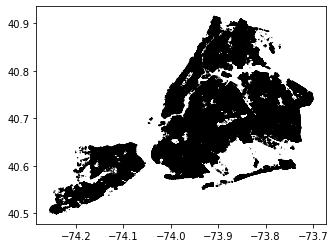

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))

#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(gpd.datasets.get_path('nybb'))
world = gpd.read_file('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/map/NYC.shp')

ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color='red')

plt.show()

In [9]:
import pandas as pd
import numpy as np

#Cargue archivos UBER
uber_2014 = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/uber_trips_2014.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'user_id': str})
uber_2015 = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/uber_trips_2015.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'user_id': str})
#Cargue archivo Taxi
taxi = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/yellow_trips.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'user_id': str})
#Cargue archivo Green Taxi
green = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/green_trips.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'user_id': str})
#Cargue archivo MTA
train = pd.read_csv('/Users/lover/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/mta_trips.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False, dtype={'user_id': str})

uber = uber_2014.append(uber_2015, sort=False, ignore_index=True)
uber_copy = uber.copy()
uber_copy['pickup_datetime'] = pd.to_datetime(uber_copy['pickup_datetime'])
uber_copy['date'] = uber_copy['pickup_datetime'].dt.date
uber_copy['day'] = uber_copy['pickup_datetime'].dt.day
uber_copy['month'] = uber_copy['pickup_datetime'].dt.month
uber_copy['year'] = uber_copy['pickup_datetime'].dt.year

In [48]:
uber_conteo = uber_copy.groupby(['year','month','day']).count()[['pickup_datetime']]
uber_conteo.rename(columns={'pickup_datetime':'count'}, inplace=True)

,pickup_datetime,pickup_latitude,pickup_longitude,base
0,4/1/14 0:11,40.7690,-73.9549,B02512
1,4/1/14 0:17,40.7267,-74.0345,B02512
2,4/1/14 0:21,40.7316,-73.9873,B02512
3,4/1/14 0:28,40.7588,-73.9776,B02512
4,4/1/14 0:33,40.7594,-73.9722,B02512
